In [120]:
import pandas as pd

In [146]:
df = pd.read_csv('realtor_data.csv')

# Inspect the data
print(df.head())
print(df.info())

   brokered_by    status     price  bed  bath  acre_lot     street  \
0     103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0   
1      52707.0  for_sale   80000.0  4.0   2.0      0.08  1902874.0   
2     103379.0  for_sale   67000.0  2.0   1.0      0.15  1404990.0   
3      31239.0  for_sale  145000.0  4.0   2.0      0.10  1947675.0   
4      34632.0  for_sale   65000.0  6.0   2.0      0.05   331151.0   

         city        state  zip_code  house_size prev_sold_date  
0    Adjuntas  Puerto Rico     601.0       920.0            NaN  
1    Adjuntas  Puerto Rico     601.0      1527.0            NaN  
2  Juana Diaz  Puerto Rico     795.0       748.0            NaN  
3       Ponce  Puerto Rico     731.0      1800.0            NaN  
4    Mayaguez  Puerto Rico     680.0         NaN            NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokere

In [147]:
# Print the list of columns in the original DataFrame before cleaning
print("Original columns:", df.columns)

# Remove columns that are irrelevant
df.drop(['brokered_by', 'status', 'prev_sold_date', 'street', 'zip_code'], axis=1, inplace=True)

# Handle missing values for numerical columns by imputing with the median
numerical_columns = ['bed', 'bath', 'acre_lot', 'house_size', 'price']
df[numerical_columns] = df[numerical_columns].apply(lambda x: x.fillna(x.median()), axis=0)

# Assuming 'city' and 'state' are the only categorical columns with missing values
# Handle missing values for categorical columns by imputing with the mode (most common value)
categorical_columns = ['city', 'state']
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

# Display all unique values in the 'state' column
print("\nAll states (Unfiltered):")
print(df['state'].unique())

# Define the list of states to delete
delete_states = ['New Brunswick', 'Puerto Rico', 'Virgin Islands', 'Guam']

# Filter the DataFrame to keep only rows where the 'state' column does not belong to the states to delete
df_cleaned = df[~df['state'].isin(delete_states)]

# Display USA states only in the 'state' column
print("\nUSA states only:")
print(df_cleaned['state'].unique())

# Recheck info
print("\nCleaned DataFrame:")
print(df_cleaned.info())
print("Cleaned columns:", df_cleaned.columns)

# Save the cleaned dataset
df_cleaned.to_csv('clean_realtor_data.csv', index=False)

Original columns: Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

All states (Unfiltered):
['Puerto Rico' 'Virgin Islands' 'Massachusetts' 'Connecticut'
 'New Hampshire' 'Vermont' 'New Jersey' 'New York' 'South Carolina'
 'Tennessee' 'Rhode Island' 'Virginia' 'Wyoming' 'Maine' 'Georgia'
 'Pennsylvania' 'West Virginia' 'Delaware' 'Louisiana' 'Ohio' 'California'
 'Colorado' 'Maryland' 'Missouri' 'District of Columbia' 'Wisconsin'
 'North Carolina' 'Kentucky' 'Michigan' 'Mississippi' 'Florida' 'Alabama'
 'New Brunswick' 'Texas' 'Arkansas' 'Idaho' 'Indiana' 'Illinois'
 'New Mexico' 'Iowa' 'Minnesota' 'South Dakota' 'Nebraska' 'North Dakota'
 'Montana' 'Oklahoma' 'Kansas' 'Oregon' 'Utah' 'Nevada' 'Washington'
 'Arizona' 'Hawaii' 'Guam' 'Alaska']

USA states only:
['Massachusetts' 'Connecticut' 'New Hampshire' 'Vermont' 'New Jersey'
 'New York' 'South Carolina' 'Tennessee

In [148]:
new_data=pd.read_csv("clean_realtor_data.csv")

In [149]:
new_data.head()

,price,bed,bath,acre_lot,city,state,house_size
0,180000.0,2.0,1.0,0.34,Agawam,Massachusetts,676.0
1,25000.0,3.0,2.0,3.41,Agawam,Massachusetts,1760.0
2,169900.0,2.0,2.0,0.26,Agawam,Massachusetts,892.0
3,242000.0,2.0,2.0,0.26,Agawam,Massachusetts,1428.0
4,299950.0,2.0,2.0,0.26,Agawam,Massachusetts,1659.0


In [150]:
import pandas as pd

# Define the threshold for affordability
threshold = 300000

# Create binary category
new_data['property_tier'] = new_data['price'].apply(lambda x: 'Affordable' if x <= threshold else 'Not Affordable')

# Preview
print(new_data[['price', 'property_tier']].head())


      price property_tier
0  180000.0    Affordable
1   25000.0    Affordable
2  169900.0    Affordable
3  242000.0    Affordable
4  299950.0    Affordable


In [151]:
new_data.head()

,price,bed,bath,acre_lot,city,state,house_size,property_tier
0,180000.0,2.0,1.0,0.34,Agawam,Massachusetts,676.0,Affordable
1,25000.0,3.0,2.0,3.41,Agawam,Massachusetts,1760.0,Affordable
2,169900.0,2.0,2.0,0.26,Agawam,Massachusetts,892.0,Affordable
3,242000.0,2.0,2.0,0.26,Agawam,Massachusetts,1428.0,Affordable
4,299950.0,2.0,2.0,0.26,Agawam,Massachusetts,1659.0,Affordable


In [126]:
new_data['property_tier'].value_counts()

,count
property_tier,
Not Affordable,1175588
Affordable,1046283


In [127]:
df_cleaned=new_data

In [128]:
# Remove duplicate rows
print('Number of duplicate rows: ', df_cleaned.duplicated().sum())
df_cleaned.drop_duplicates(inplace=True)
print('Number of duplicate rows after removal: ', df_cleaned.duplicated().sum())

Number of duplicate rows:  210635
Number of duplicate rows after removal:  0


In [129]:
# Check for missing values (null)
print(df_cleaned.isnull().sum())

price            0
bed              0
bath             0
acre_lot         0
city             0
state            0
house_size       0
property_tier    0
dtype: int64


In [130]:
# Check for missing values (na)
df_cleaned.isna().sum()

,0
price,0
bed,0
bath,0
acre_lot,0
city,0
state,0
house_size,0
property_tier,0


In [131]:
# Summary statistics for numerical columns
df_cleaned.describe()

,price,bed,bath,acre_lot,house_size
count,2.011236e+06,2.011236e+06,2.011236e+06,2.011236e+06,2.011236e+06
mean,5.377258e+05,3.232182e+00,2.394645e+00,1.351008e+01,2.535563e+03
std,2.235748e+06,1.429030e+00,1.511285e+00,7.179132e+02,7.337463e+05
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00
25%,1.749000e+05,3.000000e+00,2.000000e+00,1.700000e-01,1.449000e+03
50%,3.300000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.760000e+03
75%,5.590000e+05,4.000000e+00,3.000000e+00,7.000000e-01,2.171000e+03
max,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,1.040400e+09


In [132]:
# Summary statistics for categorical columns
df_cleaned.describe(include = ['object', 'category'])

,city,state,property_tier
count,2011236,2011236,2011236
unique,19995,51,2
top,Houston,Florida,Not Affordable
freq,22268,212247,1083092


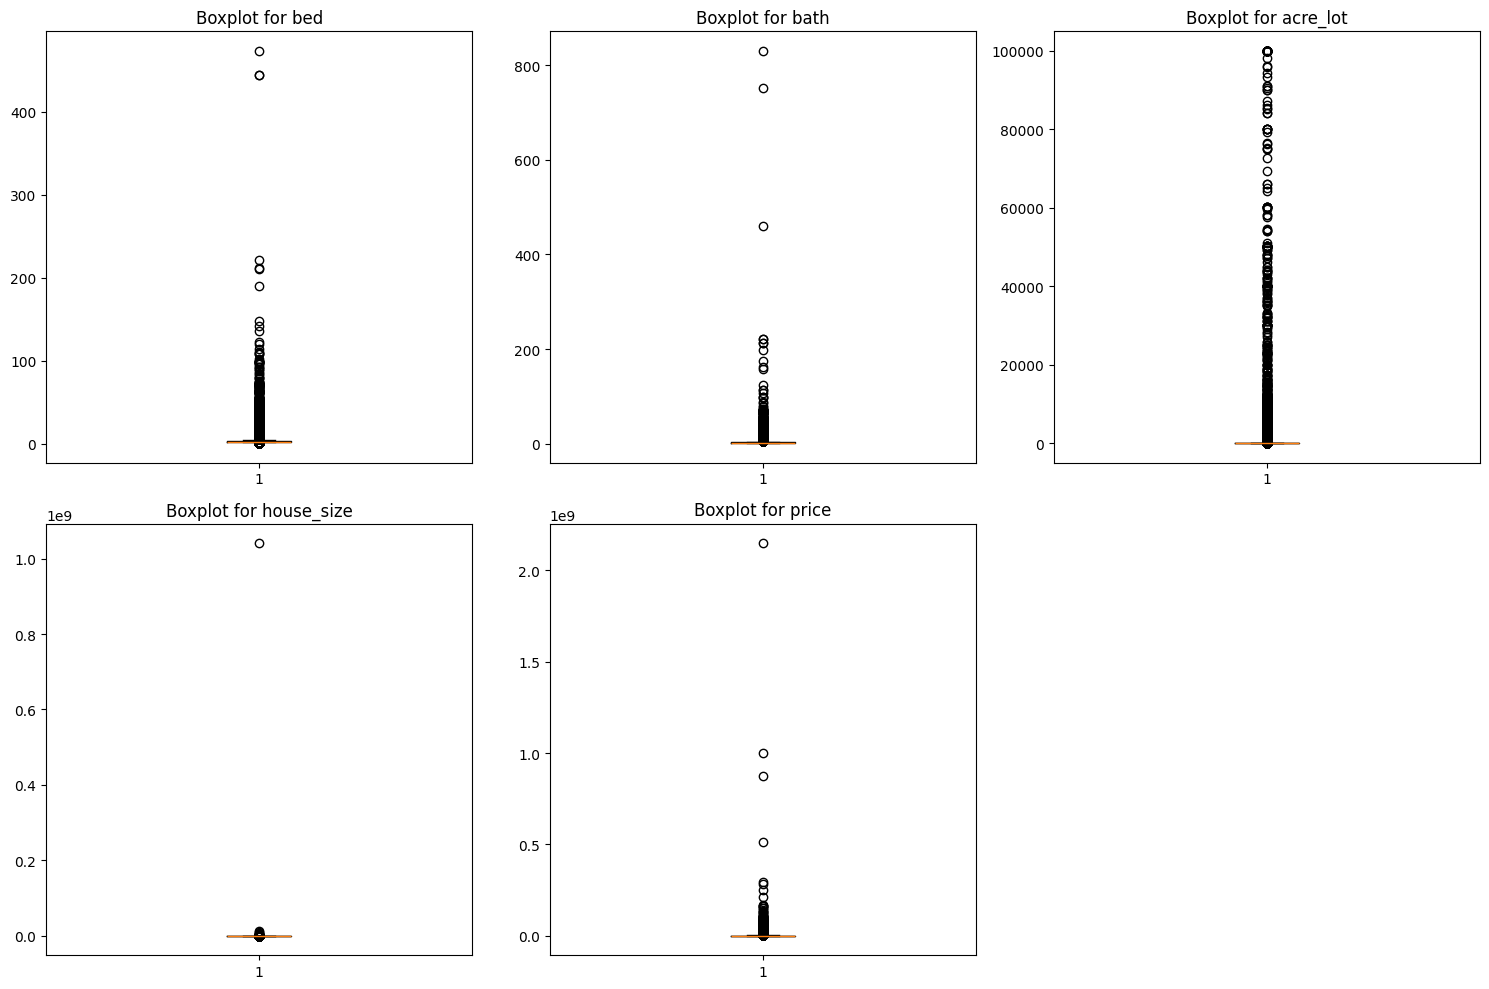

In [133]:
import matplotlib.pyplot as plt
# Check for outliers with boxplot for numerical columns

# Create a figure and a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot data on the first 5 subplots
axs[0, 0].boxplot(df_cleaned[numerical_columns[0]])
axs[0, 0].set_title(f'Boxplot for {numerical_columns[0]}')

axs[0, 1].boxplot(df_cleaned[numerical_columns[1]])
axs[0, 1].set_title(f'Boxplot for {numerical_columns[1]}')

axs[0, 2].boxplot(df_cleaned[numerical_columns[2]])
axs[0, 2].set_title(f'Boxplot for {numerical_columns[2]}')

axs[1, 0].boxplot(df_cleaned[numerical_columns[3]])
axs[1, 0].set_title(f'Boxplot for {numerical_columns[3]}')

axs[1, 1].boxplot(df_cleaned[numerical_columns[4]])
axs[1, 1].set_title(f'Boxplot for {numerical_columns[4]}')

# Remove the last (empty) subplot
fig.delaxes(axs[1][2])

# Display the figure with subplots
plt.tight_layout()
plt.show()

In [134]:
# Remove outliers for numerical columns

# Print total number of rows in filtered dataframe
print(f'Total rows with outliers : {df_cleaned.shape[0]}')

# Copy dataframe
df_no_outliers = df_cleaned.copy()

# Loop through numerical columns
for col in numerical_columns:
    # Calculate IQR
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

    # Print total number of rows after removal of outliers
    print(f'Total rows with out outliers for column {col} : {df_no_outliers.shape[0]}')

Total rows with outliers : 2011236
Total rows with out outliers for column bed : 1903347
Total rows with out outliers for column bath : 1852296
Total rows with out outliers for column acre_lot : 1545777
Total rows with out outliers for column house_size : 1465043
Total rows with out outliers for column price : 1382006


In [135]:
df_no_outliers.head()

,price,bed,bath,acre_lot,city,state,house_size,property_tier
0,180000.0,2.0,1.0,0.34,Agawam,Massachusetts,676.0,Affordable
2,169900.0,2.0,2.0,0.26,Agawam,Massachusetts,892.0,Affordable
3,242000.0,2.0,2.0,0.26,Agawam,Massachusetts,1428.0,Affordable
4,299950.0,2.0,2.0,0.26,Agawam,Massachusetts,1659.0,Affordable
5,239900.0,3.0,1.0,0.46,Agawam,Massachusetts,1196.0,Affordable


In [136]:
# 2. Drop non-numeric and target-identifying features
# Remove 'price' since it's used to define the label
X = df_no_outliers.drop(columns=['price', 'property_tier', 'city', 'state'])

In [137]:
# 4. Encode the target variable
le = LabelEncoder()
y = le.fit_transform(df_no_outliers['property_tier'])

In [138]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [139]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [162]:
import pandas as pd

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.head()


,bed,bath,acre_lot,house_size
0,-0.141390,-0.281915,1.433891,-0.373316
1,1.256894,1.135262,-0.543723,-0.486889
2,1.256894,1.135262,-0.084634,1.014588
3,-0.141390,-0.281915,1.610464,0.061727
4,-0.141390,-0.281915,2.599271,0.061727


In [164]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled_df.head()

,bed,bath,acre_lot,house_size
0,-1.539674,-0.281915,-0.296521,-1.405101
1,1.256894,-0.281915,-0.084634,0.061727
2,-0.141390,-0.281915,-0.331836,0.061727
3,-0.141390,1.135262,-0.190577,0.431322
4,-0.141390,-0.281915,-0.402465,-0.785260


In [140]:
# 7. Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [141]:
# 8. Predict and evaluate
y_pred = model.predict(X_test_scaled)

In [142]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.7035


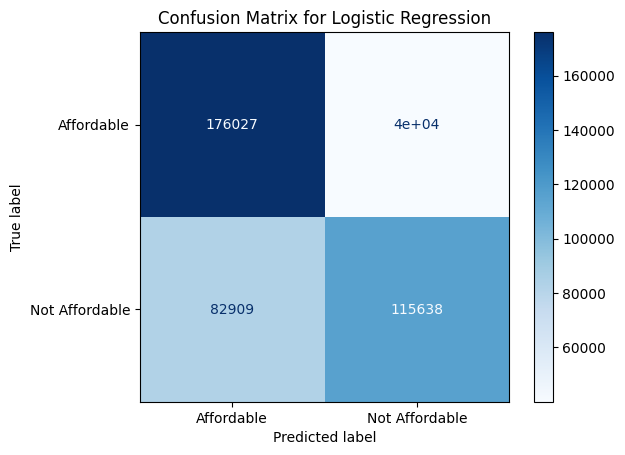

In [143]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [144]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Classification Report:
                precision    recall  f1-score   support

    Affordable       0.68      0.81      0.74    216055
Not Affordable       0.74      0.58      0.65    198547

      accuracy                           0.70    414602
     macro avg       0.71      0.70      0.70    414602
  weighted avg       0.71      0.70      0.70    414602



In [166]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")


Logistic Regression Accuracy: 0.70


Multinomial Naïve Bayes classification

In [167]:
$


In [168]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(df_no_outliers['property_tier'])  # Binary: 0 = Affordable, 1 = Not Affordable


In [169]:
from sklearn.model_selection import train_test_split

X_train_binned, X_test_binned, y_train, y_test = train_test_split(
    X_binned, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42
)


In [170]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

nb_model = MultinomialNB()
nb_model.fit(X_train_binned, y_train)


MultinomialNB()

Multinomial Naïve Bayes Accuracy: 0.61

Classification Report:
                precision    recall  f1-score   support

    Affordable       0.68      0.49      0.57    216055
Not Affordable       0.57      0.74      0.65    198547

      accuracy                           0.61    414602
     macro avg       0.63      0.62      0.61    414602
  weighted avg       0.63      0.61      0.61    414602



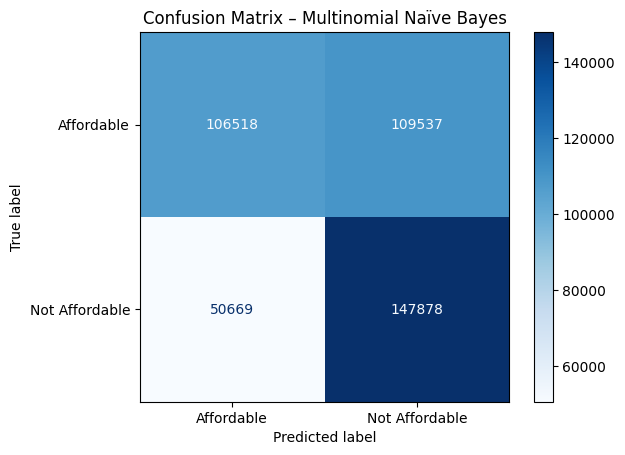

In [171]:
y_pred_nb = nb_model.predict(X_test_binned)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Multinomial Naïve Bayes Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix – Multinomial Naïve Bayes")
plt.show()
